# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Array{Float64,2}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [7]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

In [27]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

4.318e-6

#### Wersja ulepszona

In [11]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Array{Int64,2}:
 1  2
 3  4

4-element Array{Int64,1}:
 1
 3
 2
 4

In [12]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [25]:
@elapsed better_multiplication(Asmall, Bsmall)

3.336e-6

#### Wersja BLASowa

In [28]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [29]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [33]:
@elapsed naive_multiplication(A, B)

2.526261559

In [34]:
@elapsed better_multiplication(A, B)

2.043070297

In [35]:
@elapsed A*B

0.018568311

### Wielomiany i aproksymacja średniokwadratowa

In [36]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed LazyArtifacts ────── v1.3.0
  Installed Mocking ──────────── v0.7.3
  Installed InlineStrings ────── v1.1.2
  Installed Compat ───────────── v3.43.0
  Installed RecipesBase ──────── v1.2.1
  Installed MutableArithmetics ─ v0.3.3
  Installed Polynomials ──────── v2.0.25
  Installed TimeZones ────────── v1.6.2
  Installed ExprTools ────────── v0.1.8
  Installed Intervals ────────── v1.5.0
   Updating `~/.julia/environments/v1.4/Project.toml`
  [f27b6e38] + Polynomials v2.0.25
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [34da2185] + Compat v3.43.0
  [e2ba6199] + ExprTools v0.1.8
  [842dd82b] + InlineStrings v1.1.2
  [d8418881] + Intervals v1.5.0
  [4af54fe1] + LazyArtifacts v1.3.0
  [78c3b35d] + Mocking v0.7.3
  [d8a4904e] + MutableArithmetics v0.3.3
  [f27b6e38] + Polynomials v2.0.25
  [3cdcf5f2] + RecipesBase v1.2.1
  [f269a46b] + TimeZones v1.6.2
  [8bb1440f] + DelimitedFiles 
  [37e2e46d] + LinearAlgebra 
  [1a1011a3] + SharedAr

In [37]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 13 methods)

In [38]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1260


Polynomial(-1086.8658708490236 + 2905.572199468458*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [39]:
typeof(fit_poly_3)

Polynomial{Float64,:x}

In [42]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534255

In [44]:
Pkg.add("Plots")
using Plots

  Resolving package versions...
  Installed DataValueInterfaces ───────── v1.0.0
  Installed Ogg_jll ───────────────────── v1.3.4+2
  Installed LibVPX_jll ────────────────── v1.9.0+1
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed RecipesPipeline ───────────── v0.1.13
  Installed Colors ────────────────────── v0.12.8
  Installed Plots ─────────────────────── v1.6.12
  Installed FriBidi_jll ───────────────── v1.0.5+6
  Installed FreeType2_jll ─────────────── v2.10.1+5
  Installed Opus_jll ──────────────────── v1.3.1+3
  Installed x264_jll ──────────────────── v2020.7.14+2
  Installed PlotUtils ─────────────────── v1.0.15
  Installed Showoff ───────────────────── v0.3.2
  Installed GeometryTypes ─────────────── v0.8.5
  Installed ColorSchemes ──────────────── v3.17.1
  Installed libvorbis_jll ─────────────── v1.3.6+6
  Installed LAME_jll ──────────────────── v3.100.0+3
  Installed StatsAPI ──────────────────── v1.2.2
  Installed PlotThemes ────────────────── v2.0.1
  Install

   Building GR → `~/.julia/packages/GR/BwGt2/deps/build.log`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


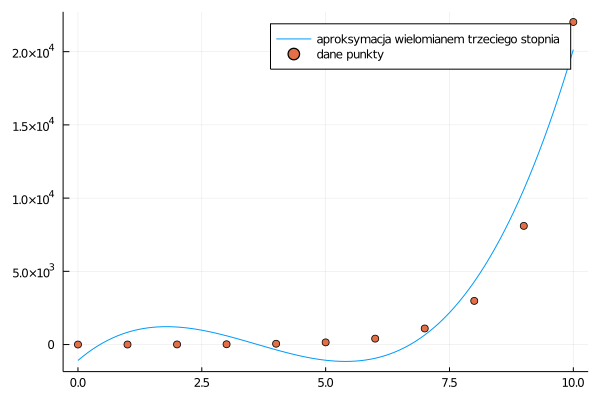

In [45]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [47]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

┌ Warning: An exported `domain` will be removed; use `Polynomials.domain`.
│   caller = poly_interval(::ChebyshevT{Int64,:x}) at plots.jl:6
└ @ Polynomials /home/daniel/.julia/packages/Polynomials/Rrf70/src/plots.jl:6
┌ Warning: An exported `domain` will be removed; use `Polynomials.domain`.
│   caller = poly_interval(::ChebyshevT{Int64,:x}) at plots.jl:6
└ @ Polynomials /home/daniel/.julia/packages/Polynomials/Rrf70/src/plots.jl:6
┌ Warning: An exported `domain` will be removed; use `Polynomials.domain`.
│   caller = poly_interval(::ChebyshevT{Int64,:x}) at plots.jl:8
└ @ Polynomials /home/daniel/.julia/packages/Polynomials/Rrf70/src/plots.jl:8
┌ Warning: An exported `domain` will be removed; use `Polynomials.domain`.
│   caller = evalpoly(::Float64, ::ChebyshevT{Int64,:x}) at ChebyshevT.jl:123
└ @ Polynomials /home/daniel/.julia/packages/Polynomials/Rrf70/src/polynomials/ChebyshevT.jl:123


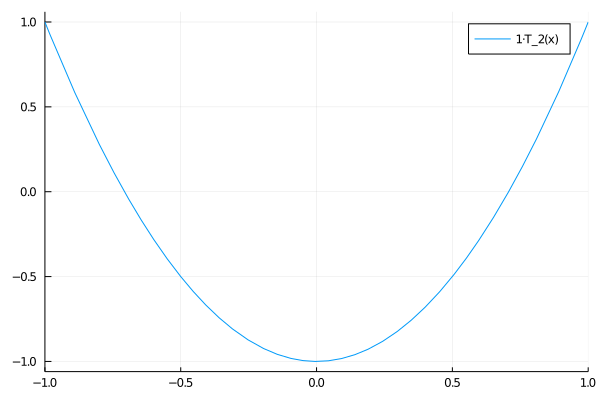

In [48]:
plot(t2)

In [49]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [50]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [51]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [52]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [53]:
# using Pkg;
# Pkg.add("TaylorSeries")

  Resolving package versions...
  Installed TaylorSeries ─ v0.12.1
   Updating `~/.julia/environments/v1.4/Project.toml`
  [6aa5eb33] + TaylorSeries v0.12.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [6aa5eb33] + TaylorSeries v0.12.1


In [54]:
using TaylorSeries

┌ Info: Precompiling TaylorSeries [6aa5eb33-94cf-58f4-a9d0-e4b2c4fc25ea]
└ @ Base loading.jl:1260


In [55]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [59]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [60]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [31]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [61]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [62]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

3.  Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


# ZAD1

In [ ]:
matrix_size = []
operation_type = []
operation_time = []

for i in 1:100
    for try_id in 1:10
        push!(operation_type, "naive_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed naive_multiplication(A,B))
    end
end

for i in 1:100
    for try_id in 1:10
        push!(operation_type, "better_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed better_multiplication(A,B))
    end
end

for i in 1:100
    for try_id in 1:10
        push!(operation_type, "BLAS_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed A*B)
    end
end

In [ ]:
using DataFrames
using Statistics

input_data_frame = DataFrame(Matrix_size = matrix_size,
    Operation_type = operation_type, Operation_time = operation_time)
df_grouped=groupby(df, [:Operation_type,:Matrix_size])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)


In [ ]:
using Plots
scatter(df_combined.Matrix_size, df_combined.Operation_time_mean,
    group=df_combined.Operation_type, yerr=df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time")